**Objective:**
    
    Predict the house price based on some parameters given.
    
**Dataset**
 
     https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

**Tutorial:**
       
    https://www.youtube.com/watch?v=ioN1jcWxbv8&list=PLZoTAELRMXVPQyArDHyQVjQxjj_YmEuO9
    https://www.youtube.com/watch?v=wR4Xfwjr-3Y&list=PLZoTAELRMXVPQyArDHyQVjQxjj_YmEuO9&index=2
       

### All the lifecycle in a data science project
    1. Data Analysis
    2. Feature Engineering
    3. Feature Selection
    4. Model Building
    5. Model Deployment

In [1]:
# Read and Analyse the data

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

# display all the columns of a dataframe, use set_options
pd.pandas.set_option('display.max_columns', None)

In [3]:
house_df = pd.read_csv('./data/house-prices-advanced-regression-techniques/train.csv')

In [4]:
house_df.shape

(1460, 81)

1460 - rows and 81 - columns

In [5]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Inference:**

Dependent Feature/ Target Feature => **SalesPrice**

All others are independent features.

#### In Data Analysis, We will analyze data to find below things

    1. Missing Values
    2. All the numerical values
    3. Distribution of numerical variables
    4. Categorical variables
    5. Cardinality of categorical variables
    6. Outliers
    7. Relationship between independent and dependent features(*SalesPrice*).

### 1. Missing Values

In [6]:
house_df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
house_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

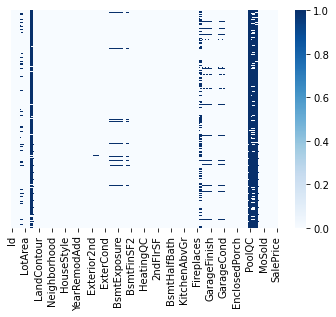

In [8]:
sns.heatmap(house_df.isnull(), yticklabels=False, cmap="Blues")

**Inference**
    
    Null values were present in multiple columns in dataframe.


In [9]:
# Find the columns with missing values and percentage of missing values in each column.

In [10]:
def find_NaN_features():
    global features_with_na
    features_with_na = [features for features in house_df.columns if house_df[features].isnull().sum()>1]
#     return features_with_na
    for feature in features_with_na:
#       take mean of null values and round it up to 4 decimal points.
        print(f'{feature}: {np.round(house_df[feature].isnull().mean(), 4)} % missing values')
find_NaN_features()

LotFrontage: 0.1774 % missing values
Alley: 0.9377 % missing values
MasVnrType: 0.0055 % missing values
MasVnrArea: 0.0055 % missing values
BsmtQual: 0.0253 % missing values
BsmtCond: 0.0253 % missing values
BsmtExposure: 0.026 % missing values
BsmtFinType1: 0.0253 % missing values
BsmtFinType2: 0.026 % missing values
FireplaceQu: 0.4726 % missing values
GarageType: 0.0555 % missing values
GarageYrBlt: 0.0555 % missing values
GarageFinish: 0.0555 % missing values
GarageQual: 0.0555 % missing values
GarageCond: 0.0555 % missing values
PoolQC: 0.9952 % missing values
Fence: 0.8075 % missing values
MiscFeature: 0.963 % missing values


**Inference:**
    
    We found out the % of missing values in these features.

#### Since there are missing values, we need to find the relationship b/w missing values and dependent feature SalesPrice.

In [11]:
# time: 11:03

Before dropping missing values, first we have to ensure whether the same has some relationship with dependent feature
**SalesPrice** 

Whether this missing values some dependency with dependent feature.

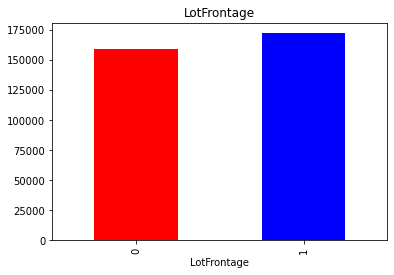

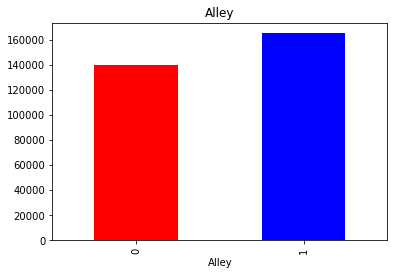

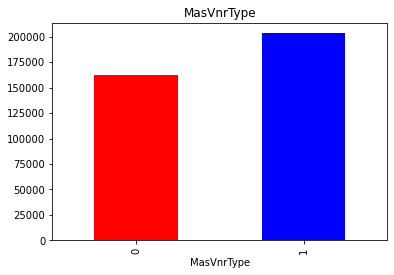

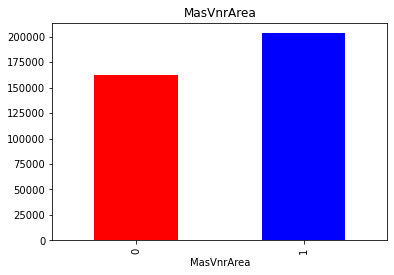

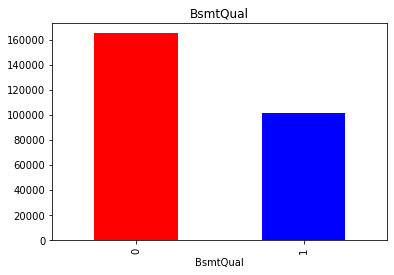

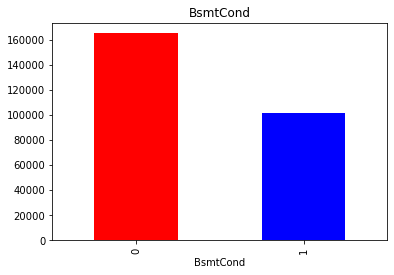

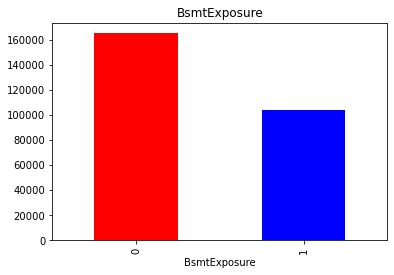

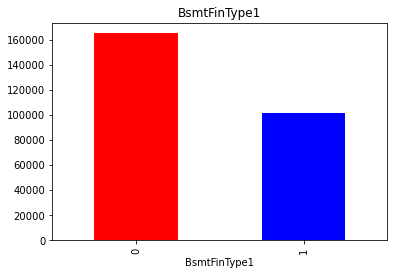

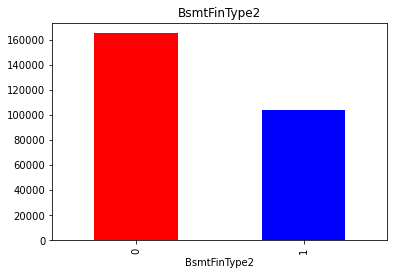

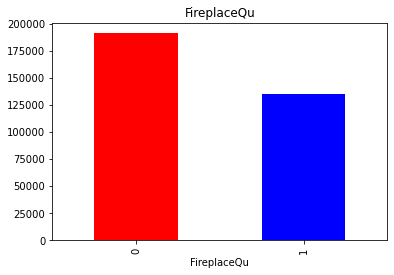

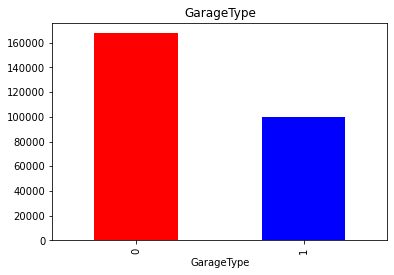

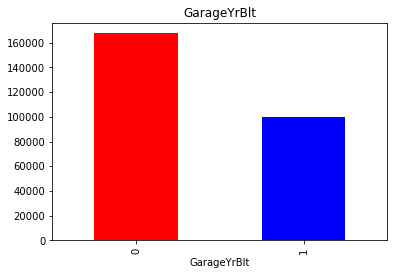

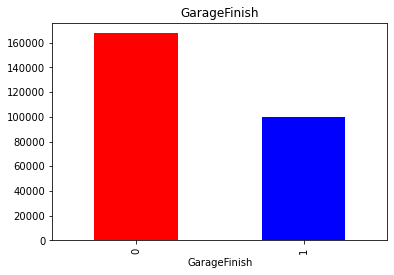

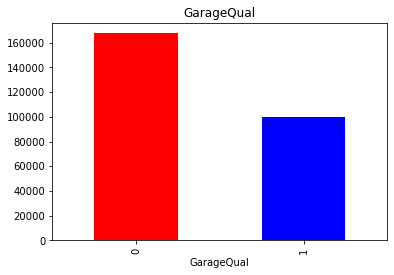

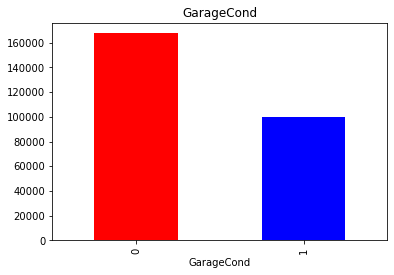

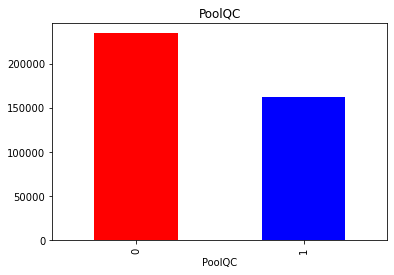

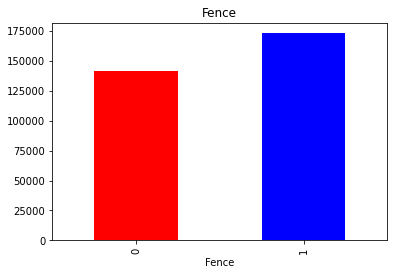

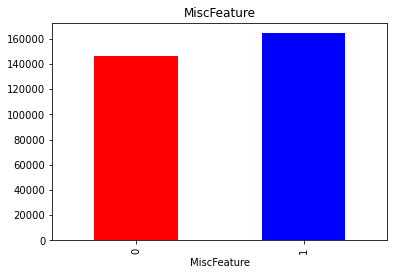

In [12]:
for feature in features_with_na:
    
    # make dataframe copy
    house_df_1 = house_df.copy()
    
    # if null value in feature, put 1. if feature value is not null, put 0.
    # we are replacing null values in the feature with 1, else 0.     
    house_df_1[feature] = np.where(house_df_1[feature].isnull(), 1, 0)

    # find saleprice median by the feature and plot a bar graph.        
    house_df_1.groupby(feature)['SalePrice'].median().plot.bar(color=['red', 'blue'])
    plt.title(feature)
    plt.show()    

**Inference**

    We replaced feature with null values to 1 and feature with not nan values to 0.
    for some feature like `LotFrontage`, `Alley` having more null values. 
    for some fetuares like `GarageQual`, `GarageCond` having less null values.
    Based on this nan values salesprice also varies in some places, so it has some relation with each other.
    
**Observation**

    Here relation between missing values and dependent feature is visible. so we replace this missing values with some meaningfull data else it may affect our model and predictions.
   

In [13]:
house_df.groupby('Street')['SalePrice'].median()

Street
Grvl    114250
Pave    163000
Name: SalePrice, dtype: int64

### 2. Numerical Features

In [14]:
# Find all numerical fetaures in the dataset.

In [15]:
def numerical_features():
    global numerical_features
    # return features with no object type. object type indicates feature with string values.
    # dtype!='O' means no features with object type is needed. and return numerical features.
    numerical_features = [feature for feature in house_df.columns if house_df[feature].dtypes != 'O']
    
    print(f'Number of numerical features: {len(numerical_features)}')
numerical_features()

Number of numerical features: 38


In [16]:
house_df[numerical_features].head()

# we got all numerical features in the dataframe.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [17]:
house_df['Street'].dtype

dtype('O')

### 3. Temporal Variables (DataTime variables)

from the dataset we have 4 year variables. we have to extract information from datetime variables 
like no. of years or no. of days. One example in this specific scenario is difference in year between 
the year the house was built and the year house was sold. We will perform this analysis in feature eengineering.

In [18]:
# get temporal variables like YearBuilt, YearRemodAdd

temporal_features = [feature for feature in house_df.columns if 'Yr' in feature or 'Year' in feature]
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
# Explore the contents in these features

In [20]:
for feature in temporal_features:
    print(feature, house_df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [21]:
# Analyse the temporal variables

#### Let's analyse if there is a relation between temporal feature YrSold and dependent feature SalePrice

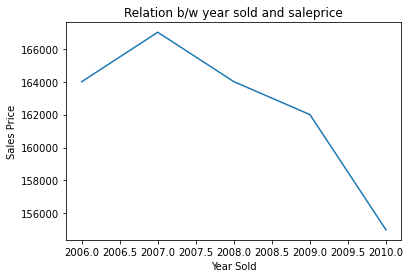

In [22]:
# find median of sale price by year in which house was sold.
house_df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel(xlabel='Year Sold')
plt.ylabel(ylabel='Sales Price')
plt.title(label='Relation b/w year sold and saleprice')
plt.show()

**Inference**

We can infer that as year goes by, the median house price decreases.
Usually when year goes up, house price should be increasing. so this information is not true.
so we have to find more informations.

In [23]:
# time : 15: 20

In [24]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### Compare the relationship b/w  all year features and house SalePrice.

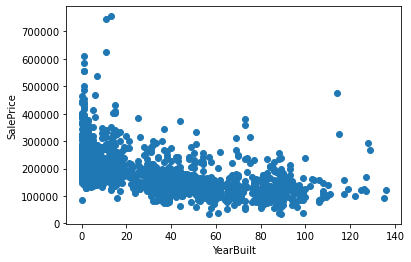

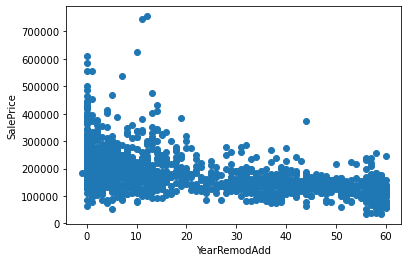

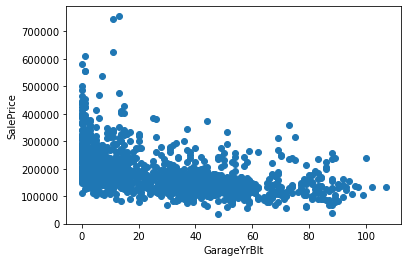

In [25]:
for feature in temporal_features:
    if feature!= 'YrSold':
        # copy of dataframe
        house_df_2 = house_df.copy()
        
        # compare the difference of year features and year which house sold
        house_df_2[feature] = house_df_2['YrSold'] - house_df_2[feature]
        
        # scatter plot to show relation b/w year feature and salesprice of house         
        plt.scatter(x=house_df_2[feature], y=house_df_2['SalePrice'])  
        
        # other plot paramters         
        plt.xlabel(xlabel=feature)
        plt.ylabel('SalePrice')
        plt.show()

**Inference:**

    When we look the first graph (yearbuilt vs salesprice) we can find that, Suppose if the house is very old like with in the range of 120 - 140 years old, then sale price is normally lower. if house is not old like with in the range of 0 - 10 years old, then sale price is very higher.
    
    Similarly, the second graph shows if house remodification was done 60 years back then house sale price is lower, if house remodification was done at latest (0-10), then saleprice is higher.
    
Remember: values in x-axis is the difference of particular year feature with the year house was sold .

### Numerical variable 
     2 types:
         1. Discrete Variable
         2. Continous Variable

#### Discrete Variables
      
      Are the ones with in a fixed range or in a finite set of values.
      No Infinite outcomes.
      Eg: Tossing a coin {0,1}, rolling a dice {1,2,3,4,5,6}.

In [26]:
# find the discrete features in our dataset

In [27]:
# If length of unique values in numerical features are < 25 and not an year feature and not an Id feature, 
# if all the above satisfies then it is a discrete variable.
discrete_features = [feature for feature in numerical_features if len(house_df[feature].unique()) < 25 and feature not in temporal_features + ['Id']]
discrete_features
print(f'Discrete Variable Count: {len(discrete_features)}')


Discrete Variable Count: 17


In [28]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [29]:
# So there are total of 17 discrete variables in our dataset.

In [30]:
house_df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [31]:
house_df[discrete_features].shape

# 1460 rows and 17 columns

(1460, 17)

In [32]:
len(house_df['OverallQual'].unique()) < 25 # discrete feature example

True

In [33]:
# find the relationship between discrete feature and SalePrice

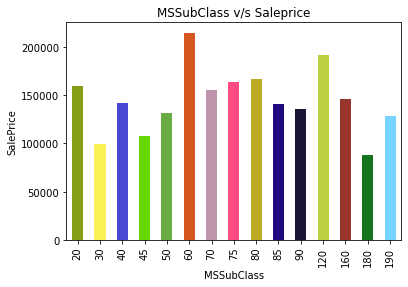

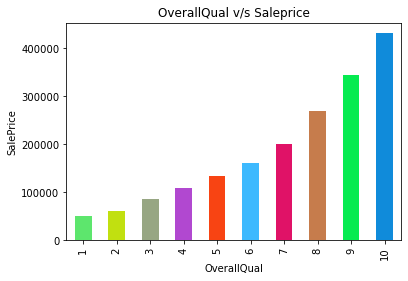

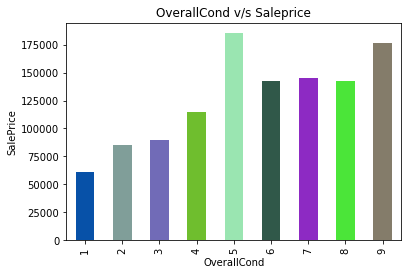

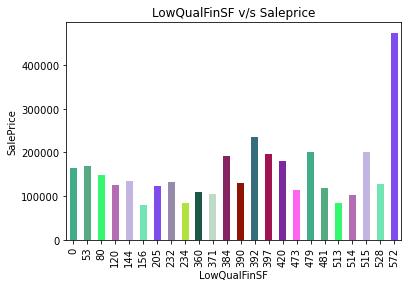

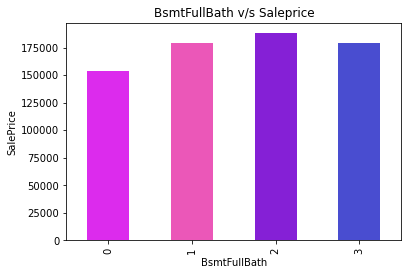

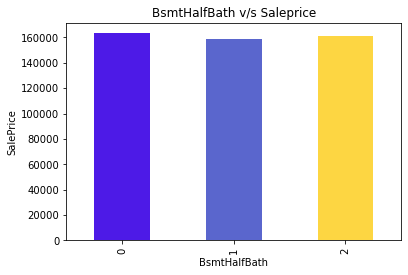

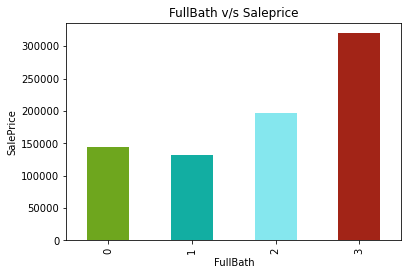

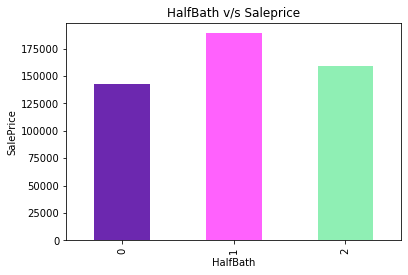

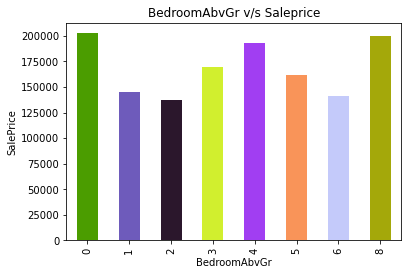

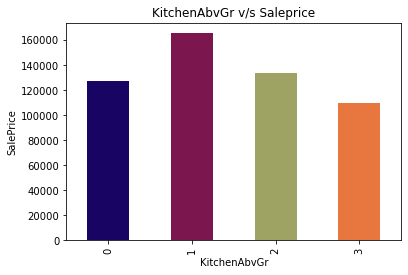

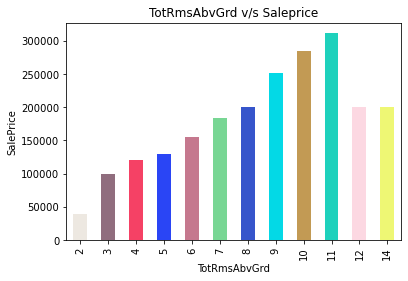

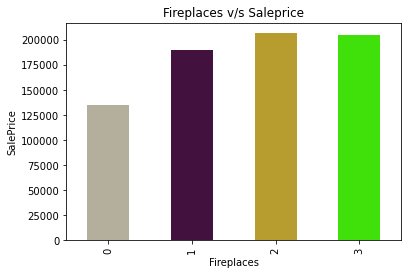

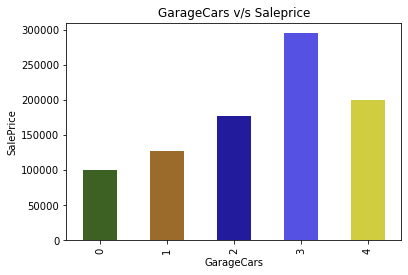

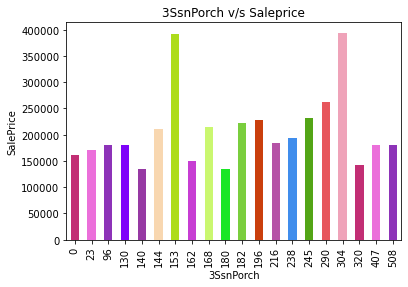

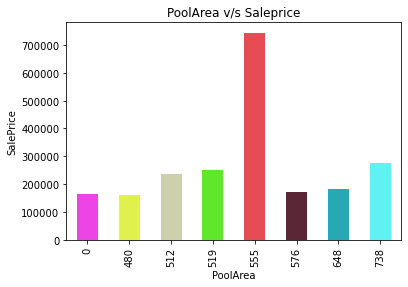

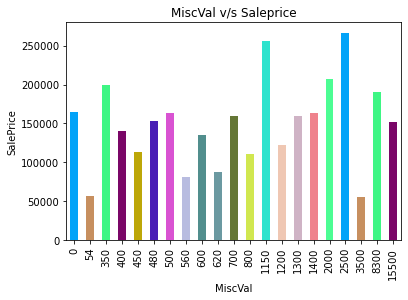

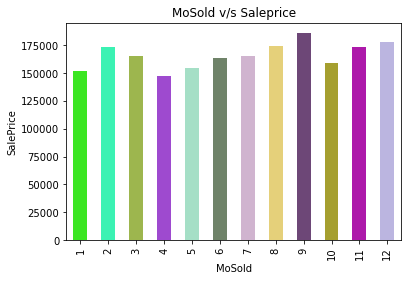

In [34]:
for feature in discrete_features:
    # take a dataset copy
    house_df_3 = house_df.copy()
    # find median of saleprice by particular discrete feature - plot a bar graph later.
    house_df_3.groupby(feature)['SalePrice'].median().plot.bar(
            color=["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(discrete_features))])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} v/s Saleprice')
    plt.show()

**Inference:**


        There is relationship b/w some discrete features and SalePrice.
        As you can see in the second graph **OverallQual vs SalePrice**, 
        there is an exponential increase in SalePrice when OverallQual increases.
        This relationship is called `monotonic relationship`.
        
        We can see monotonic relationship in other discrete feature also.
        So obviously there are relationship b/w discrete features and SalePrice.
        
 **Monotonic Relationship:**
     
         A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable, OR, (2) as the value of one variable increases, the other variable value decreases.
 
        

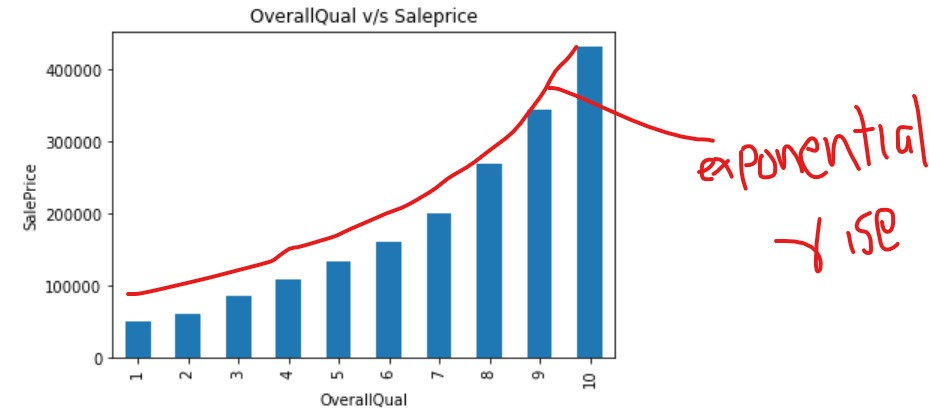

#### Continuos Variables

In [35]:
# continouf feaures are ones not in discret feature list, not in temporal features list and not an Id feature.
continuos_features = [feature for feature in numerical_features if feature not in discrete_features
                      and feature not in temporal_features + ['Id']]
continuos_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [36]:
print(f'Continous features Count: {len(continuos_features)}')

Continous features Count: 16


In [37]:
# there are 16 continous features in the dataset.

In [38]:
house_df[continuos_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


In [39]:
# Find the relationship b/w continous features with SalePrice.

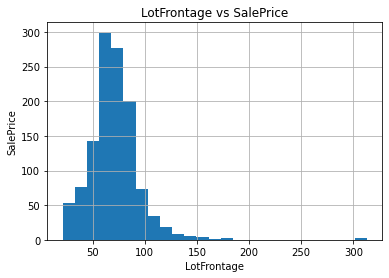

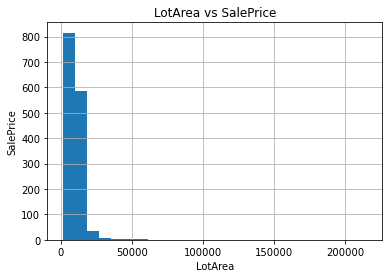

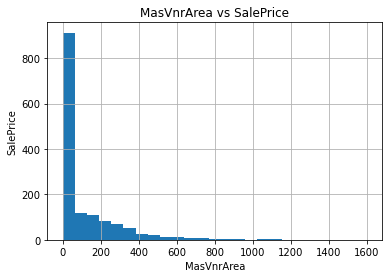

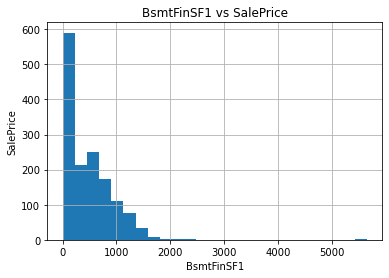

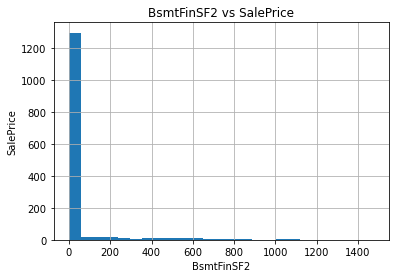

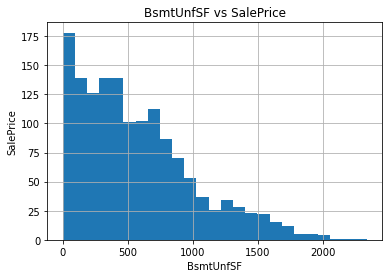

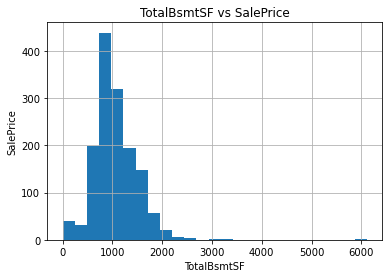

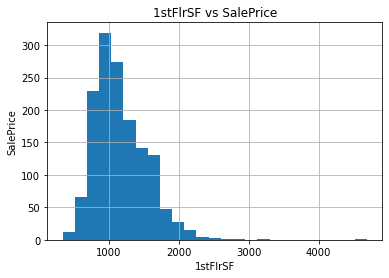

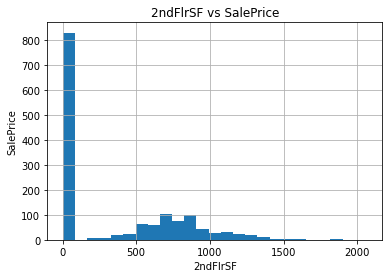

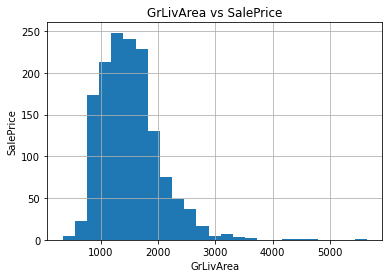

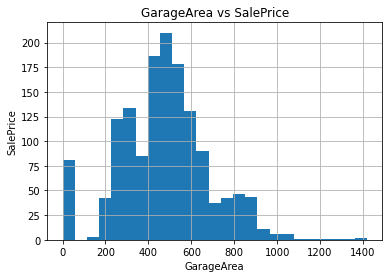

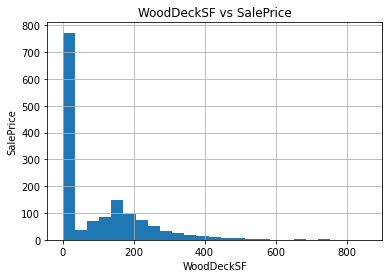

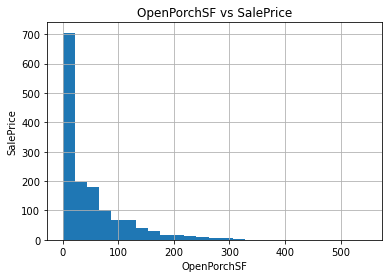

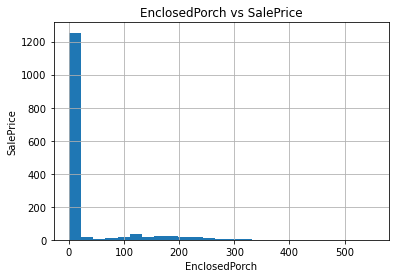

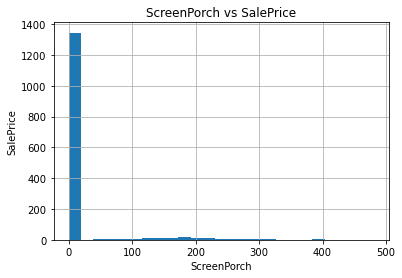

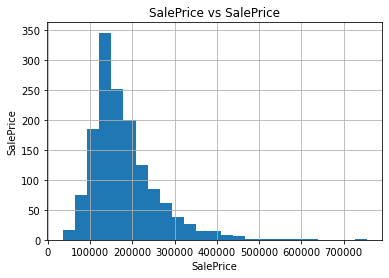

In [40]:
for feature in continuos_features:
    # make a dataset copy
    house_df_4 = house_df.copy()
    
    # plot the data in histogram.
    house_df_4[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice')
    # plt.show() should be given since using loops. if not given, only first plot is shown
    plt.show()
    

**Inference:**

    We can view that some feature follows a guassian/normal distribution(bell shaped curve plot)
    Eg: TotalBsmtSf vs SalePrice
    
    While other features not following a guassian distribution meaning the data distribution 
    is skewed.
    So we have to convert this to a guassian distribution using log normalization technique.
    This will b done in part 2.

In [41]:
# time: 7:25

### Exploratory Data Analysis Part 2

In [42]:
# convert non-guassian distribution of continous features to log normal distribution.

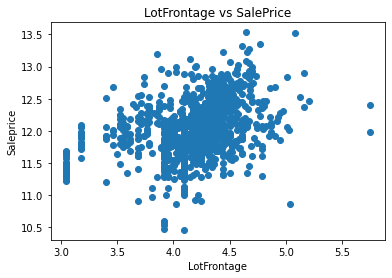

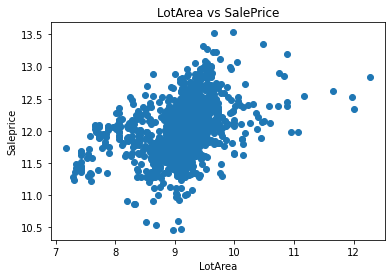

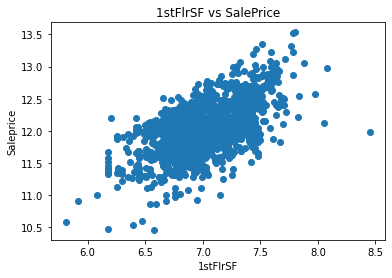

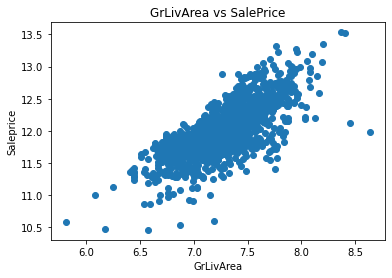

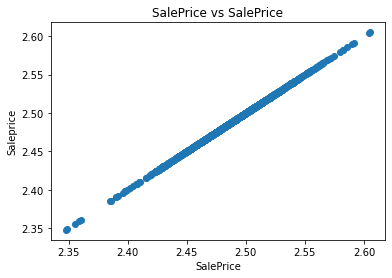

In [43]:
for feature in continuos_features:
    
    # make a dataset copy
    data = house_df.copy()
    
    # if 0 present in feature, then pass to else
    # we ignore 0 values in the feature since log of 0 is undefined. 
    # np.log(0) returns a warning as well.
    if 0 in data[feature].unique():
        pass
    else:
        # transform the continous feature to log normal distribution using np.log()
        data[feature] = np.log(data[feature])
        
        # transform SalePrice feature to log normal distribution since it is the target feature
        data['SalePrice'] = np.log(data['SalePrice'])
        
        # plot the data
        plt.scatter(x=data[feature],y=data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Saleprice')
        plt.title(f'{feature} vs SalePrice')
        plt.show()
    
        

**Inference:** 

    SalePrice feature gives a straight line.
    All other continuos features follows a monotonomic relationship(ie values of one variable increases other variable also increases).
    
  **Conclusion:**
  
    This way we apply log normal distibution to features not following guassian distribution.
    

### Outliers

Outliers are the data points that varies a lot from other data points. The difference b/w outliers and other data points will be big.

Eg: 

    Suppose a set of 12 values, where 9 of them have similar or same distance with each other, 
    while remaining 3 values varies a lot from others. Ie. distance b/w these 3 values with other 9 values will big. Then this 3 values are the outliers of dataset.

**We have to find out the oultiers in conitnous features. For that we use box plots.**

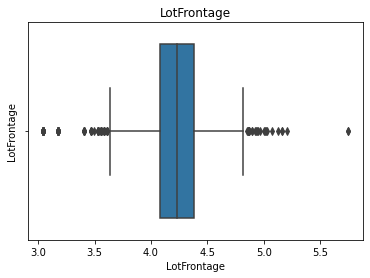

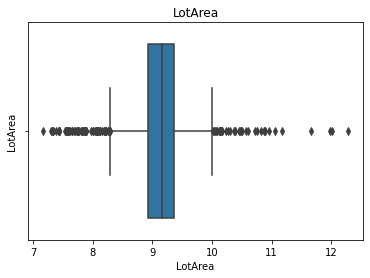

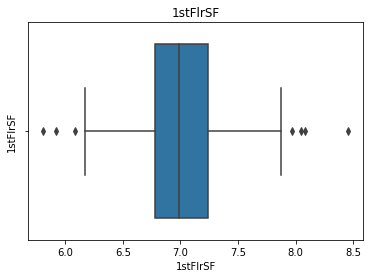

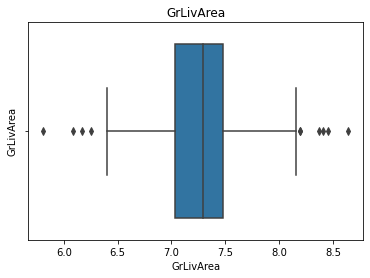

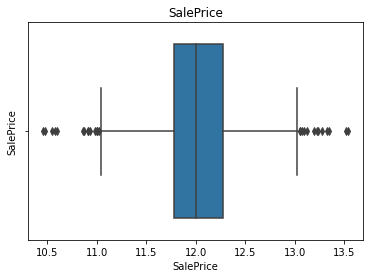

In [44]:
for feature in continuos_features:
    # make dataset copy     
    data = house_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        # find log normal distribution of features
        data[feature] = np.log(data[feature])
        sns.boxplot(x=data[feature], data=data, orient="h")
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

        
    
        

**Inference:**
    
    There are whole lot of outliers in every continuos features. we have to remove them in feature engineering.
    

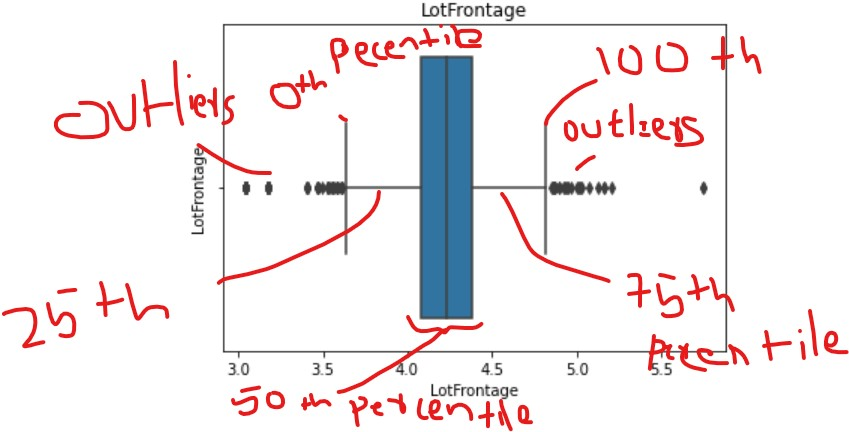

### Categorical Variables

In [45]:
# finding categorical features in the dataset.

In [46]:
categorical_features = [feature for feature in house_df.columns if house_df[feature].dtype == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [47]:
house_df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [48]:
house_df[categorical_features].shape

(1460, 43)

**First thing to focus on categorical features are cardinality values. That basically means that how many no. of categories are present in our ceatgorical features.**

In [49]:
# Finding unique categories in each continous feature

In [50]:
for feature in categorical_features:
    print(f'Feature is {feature} and Number of unique categories are {len(house_df[feature].unique())}')

Feature is MSZoning and Number of unique categories are 5
Feature is Street and Number of unique categories are 2
Feature is Alley and Number of unique categories are 3
Feature is LotShape and Number of unique categories are 4
Feature is LandContour and Number of unique categories are 4
Feature is Utilities and Number of unique categories are 2
Feature is LotConfig and Number of unique categories are 5
Feature is LandSlope and Number of unique categories are 3
Feature is Neighborhood and Number of unique categories are 25
Feature is Condition1 and Number of unique categories are 9
Feature is Condition2 and Number of unique categories are 8
Feature is BldgType and Number of unique categories are 5
Feature is HouseStyle and Number of unique categories are 8
Feature is RoofStyle and Number of unique categories are 6
Feature is RoofMatl and Number of unique categories are 8
Feature is Exterior1st and Number of unique categories are 15
Feature is Exterior2nd and Number of unique categories 

**Inference:**
    
    We got the unique feature in categories.
    Categories like `Neighborhood`, `Exterior1st`, `Exterior2st` .. having large no of unique 
    categories which we have to deal with encoding.
    
    
    
    

In [51]:
# Find the relationship between categorical features and dependent feature SalePrice

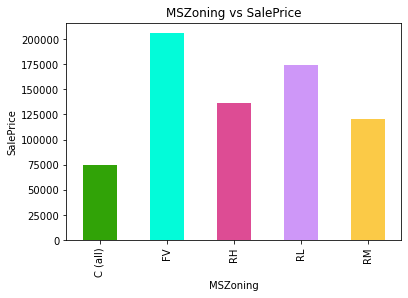

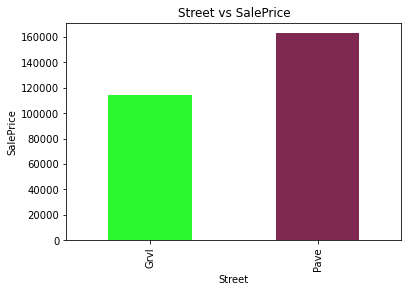

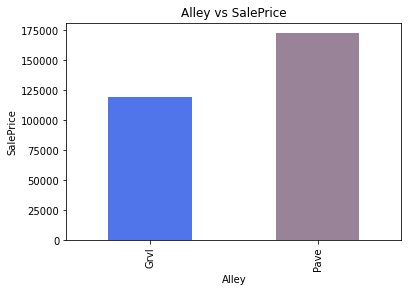

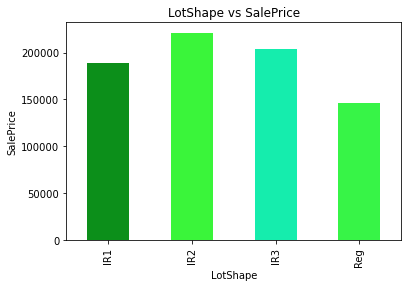

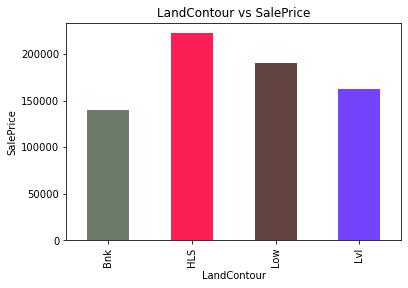

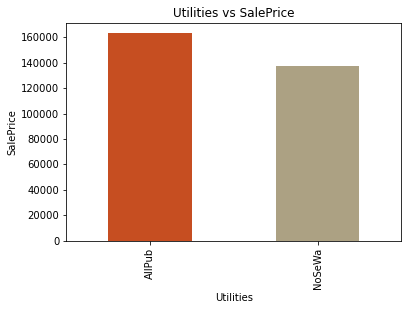

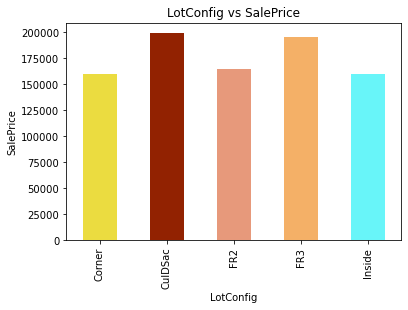

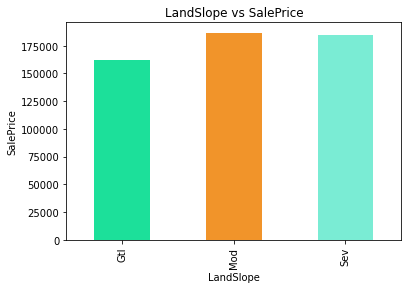

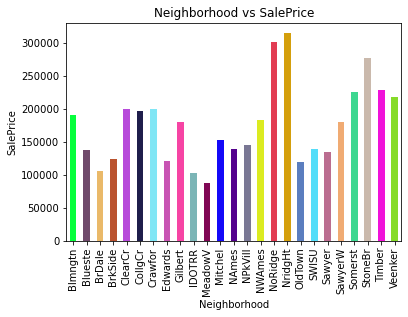

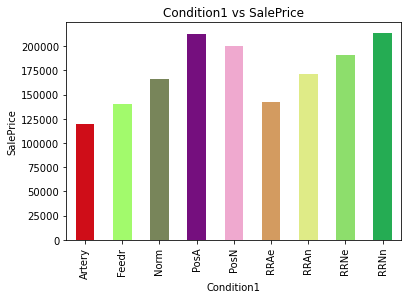

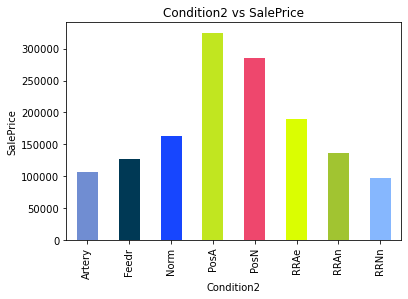

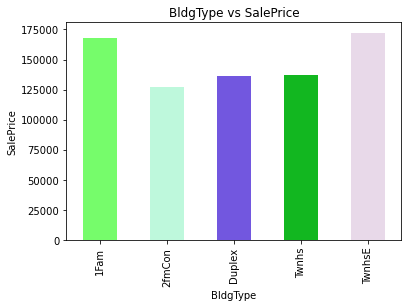

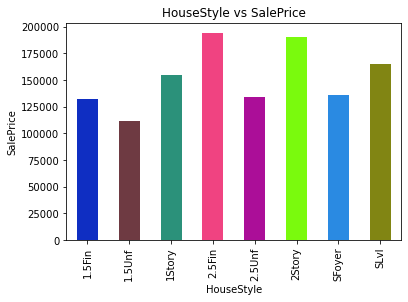

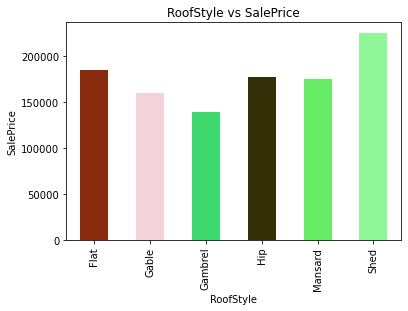

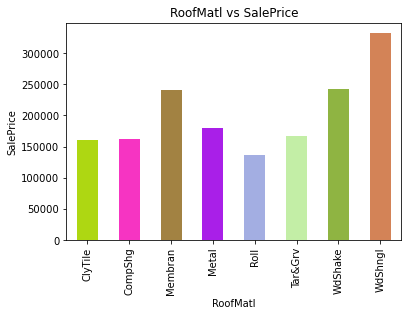

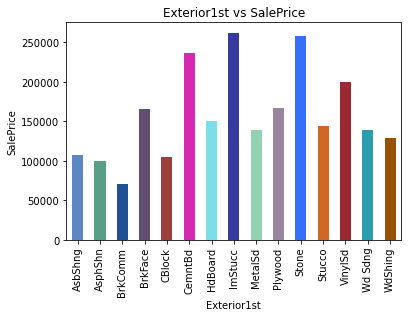

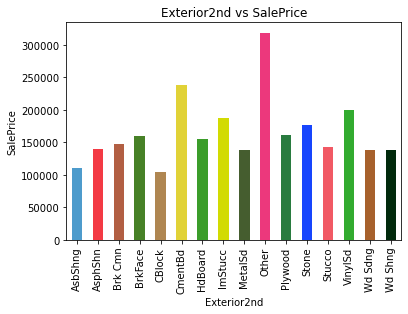

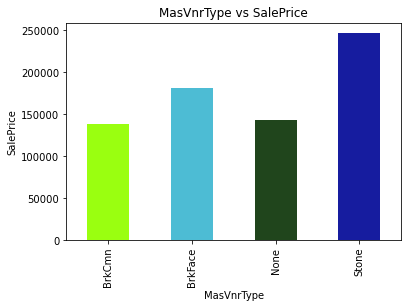

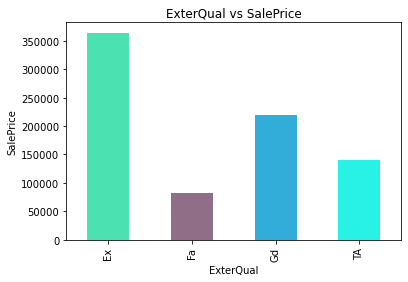

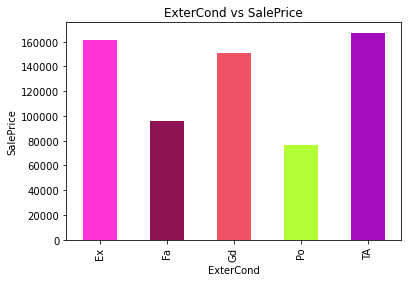

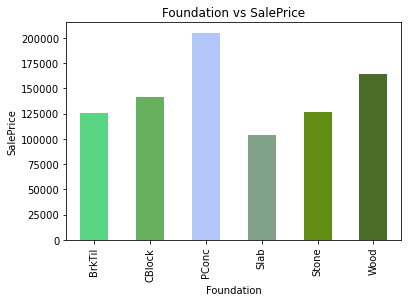

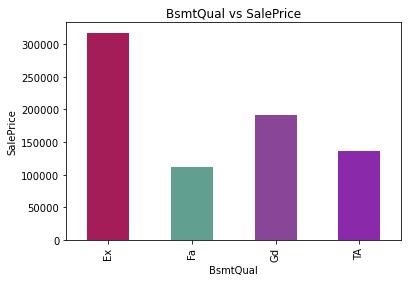

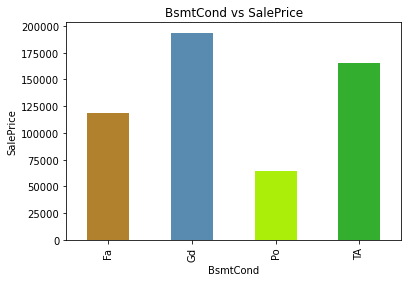

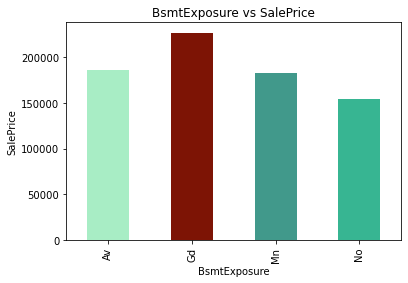

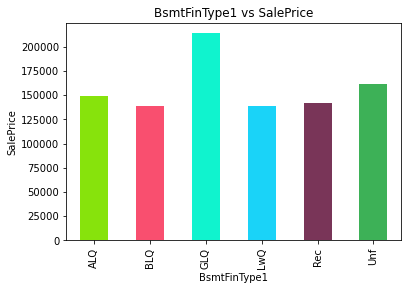

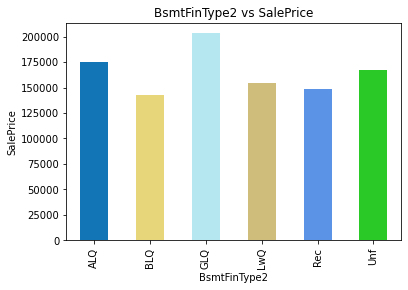

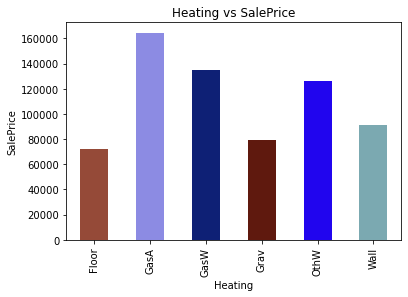

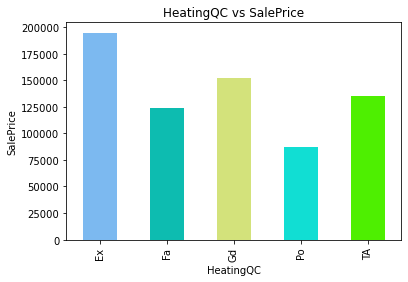

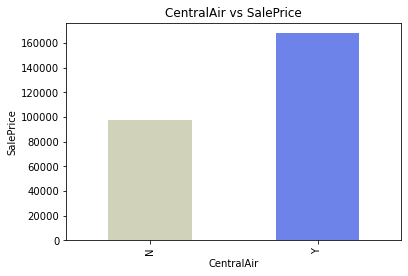

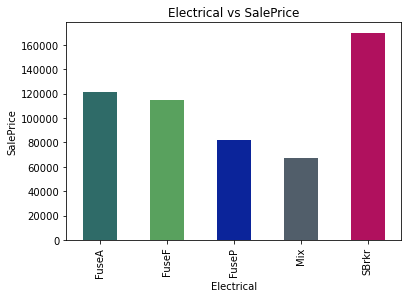

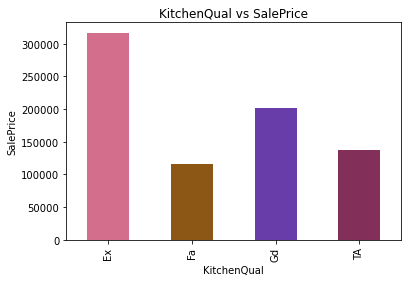

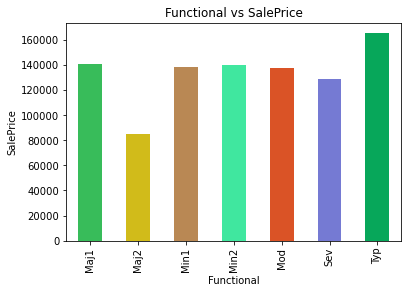

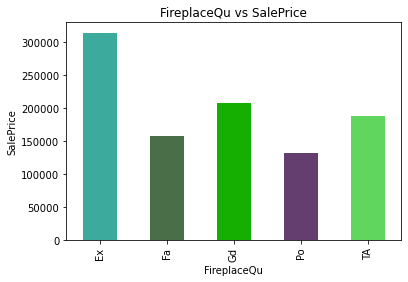

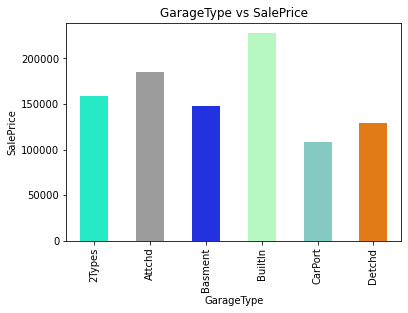

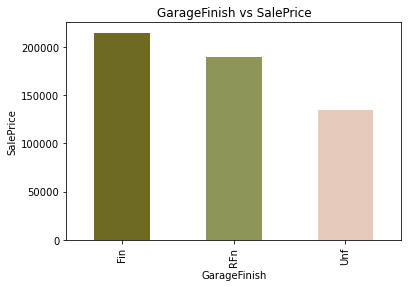

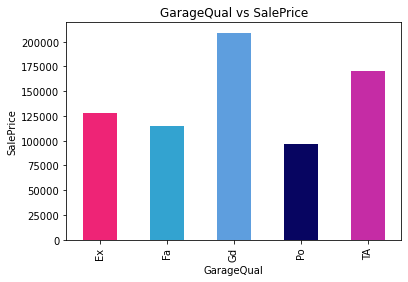

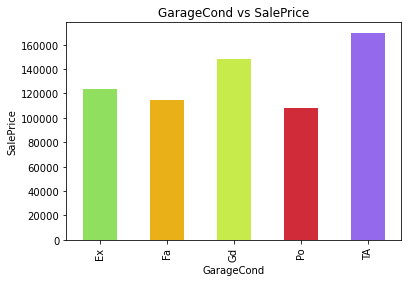

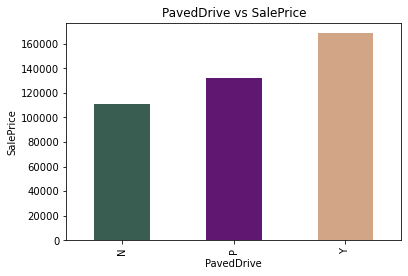

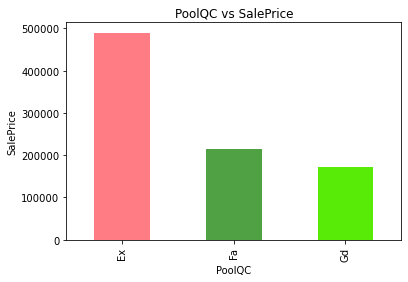

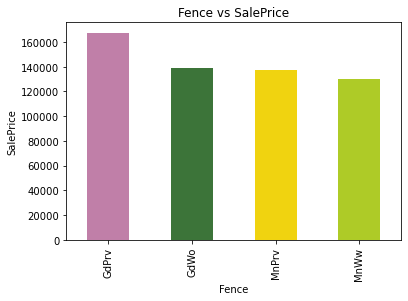

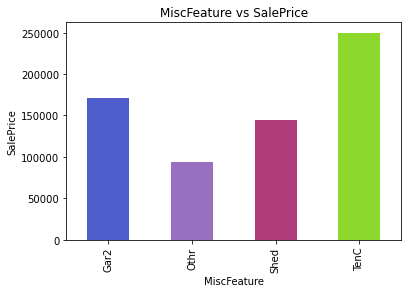

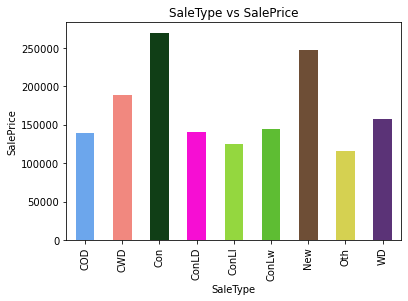

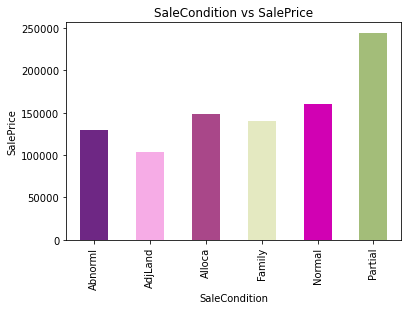

In [52]:
for feature in categorical_features:
    # make dataset copy
    data = house_df.copy()
    # find the median of SalePrice by each categorical feature - plot a bar graph
    data.groupby(feature)['SalePrice'].median().plot.bar(
        color=["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(categorical_features))])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(label=f"{feature} vs SalePrice")
    plt.show()

**Inference:**
    
    We analyze the relationship between categorical features with dependent feature.
  
    Next we will do feature engineering.

#### Trick: Different colors for each bar in the bar plot.  Use below code